In [32]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
path = str(Path.cwd().parent)
print(path)
sys.path.insert(1, path)

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/joaquin/Documents/GitHub/skforecast


In [33]:
# !pip install ucimlrepo

In [34]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
gas_turbine_co_and_nox_emission_data_set = fetch_ucirepo(id=551) 
  
# data (as pandas dataframes) 
X = gas_turbine_co_and_nox_emission_data_set.data.features 
y = gas_turbine_co_and_nox_emission_data_set.data.targets 
  
# metadata 
print(gas_turbine_co_and_nox_emission_data_set.metadata) 
  
# variable information 
print(gas_turbine_co_and_nox_emission_data_set.variables) 


{'uci_id': 551, 'name': 'Gas Turbine CO and NOx Emission Data Set', 'repository_url': 'https://archive.ics.uci.edu/dataset/551/gas+turbine+co+and+nox+emission+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/551/data.csv', 'abstract': 'The dataset contains 36733 instances of 11 sensor measures aggregated over one hour, from a gas turbine located in Turkey for the purpose of studying flue gas emissions, namely CO and NOx.', 'area': 'Computer Science', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 36733, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5WC95', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by mea

In [25]:
X

,year,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,datetime
0,2011,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2011-01-01 00:00:00
1,2011,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2011-01-01 01:00:00
2,2011,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2011-01-01 02:00:00
3,2011,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2011-01-01 03:00:00
4,2011,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36728,2015,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172,2015-03-11 08:00:00
36729,2015,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849,2015-03-11 09:00:00
36730,2015,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147,2015-03-11 10:00:00
36731,2015,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738,2015-03-11 11:00:00


source: https://archive.ics.uci.edu/static/public/551/data.csv

Description: The dataset contains 36733 instances of 11 sensor measures aggregated over one hour, from a gas turbine located in Turkey for the purpose of studying flue gas emissions, namely CO and NOx. Available variables include: Ambient temperature (AT), Ambient pressure (AP), Ambient humidity (AH), Air filter difference pressure (AFDP), Gas turbine exhaust pressure (GTEP), Turbine inlet temperature (TIT), Turbine after temperature (TAT), Compressor discharge pressure (CDP), Turbine energy yield (TEY), Carbon monoxide (CO), and Nitrogen oxides (NOx).

In [35]:
# Añadir indice
X['datetime'] = pd.date_range(start="2011-01-01 00:00:00", periods=len(X), freq="h")
X = X.drop(columns=["year"])
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,datetime
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2011-01-01 00:00:00
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2011-01-01 01:00:00
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2011-01-01 02:00:00
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2011-01-01 03:00:00
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172,2015-03-11 08:00:00
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849,2015-03-11 09:00:00
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147,2015-03-11 10:00:00
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738,2015-03-11 11:00:00


In [38]:
X['datetime'].max()

Timestamp('2015-03-11 12:00:00')

In [28]:
X.to_csv("gas_turbine_co_and_nox_emission.csv", index=False)

<Figure size 1500x1000 with 0 Axes>

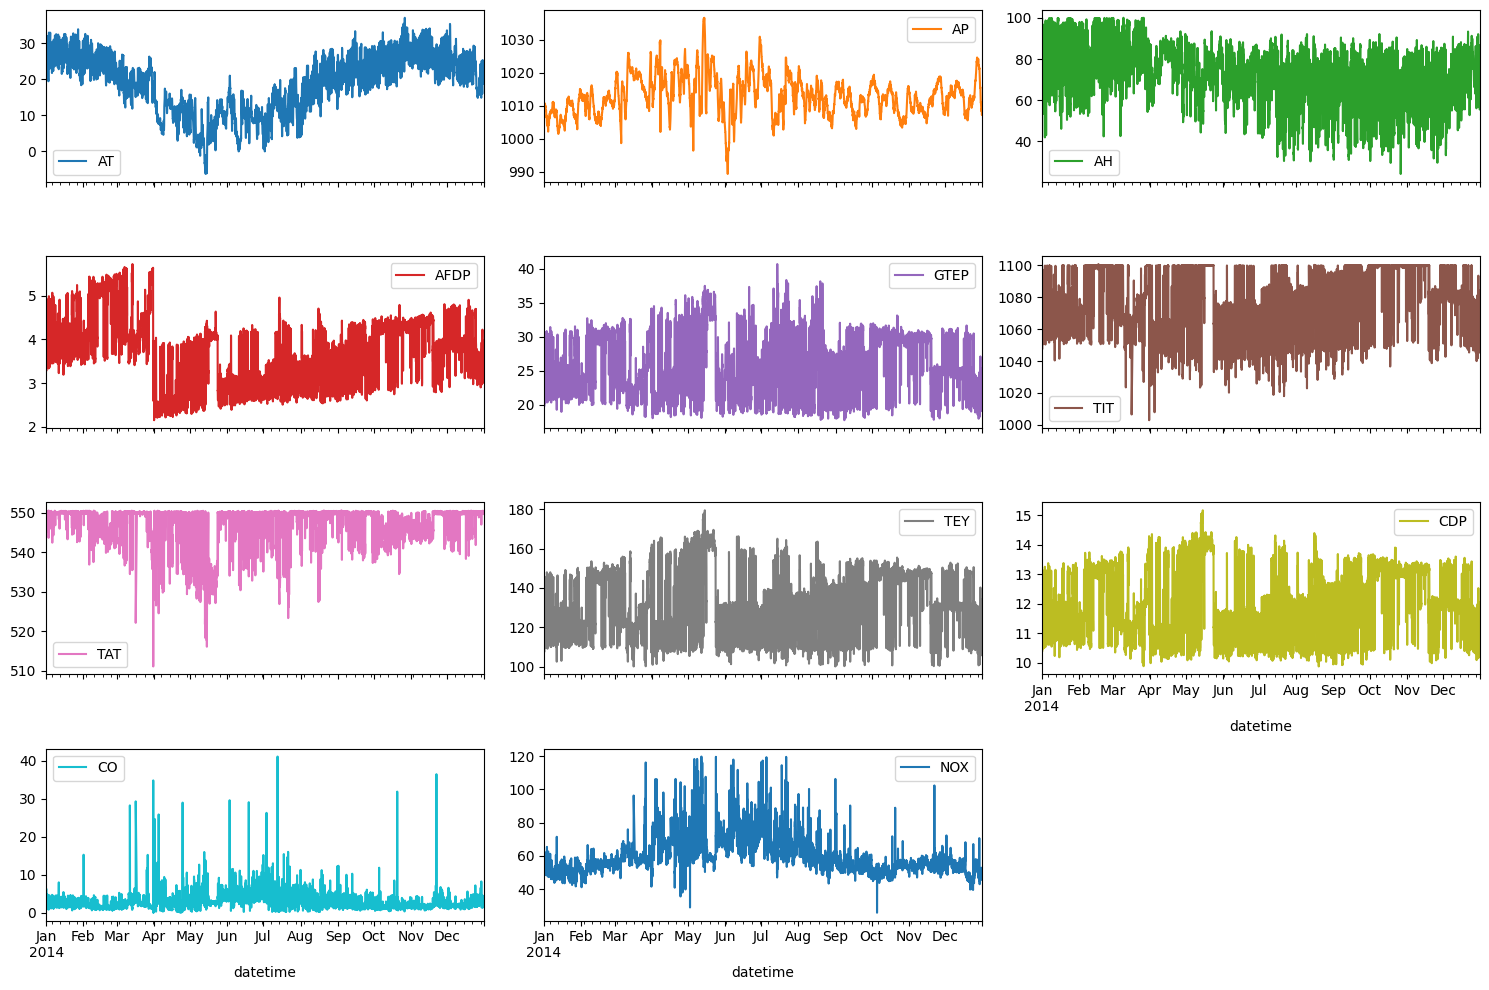

In [31]:
# Plot each of the variables
import matplotlib.pyplot as plt
import seaborn as sns

X = X.query("datetime >= '2014-01-01 00:00:00' and datetime < '2015-01-01 00:00:00'")
plt.figure(figsize=(15, 10))
X.plot(x="datetime", subplots=True, layout=(4, 3), figsize=(15, 10), sharex=True)
plt.tight_layout()